# Smart Flow FT5009

# 1.0 Setup

## 1.1 Import library

In [3]:
# System
from functools import partial

# EDA
import pandas as pd

In [4]:
# User defined
import constants
from portfolio import BacktestPortfolio

In [5]:
# Suppress pandas warning
pd.options.mode.chained_assignment = None

# 2.0 Load data

In [6]:
read_csv = partial(pd.read_csv, parse_dates=['published date'], index_col='published date')

In [7]:
inst_buy = read_csv(constants.inst_buy_file)
inst_sell = read_csv(constants.inst_sell_file)
retail_buy = read_csv(constants.retail_buy_file)
retail_sell = read_csv(constants.retail_sell_file)

# 3.0 Backtesting

**Strategy - Follow buy and sell strategy**

Assumptions:
- Buy on Monday with value-weighted based on the 'net amount (S$M)' from the report
- Clear all the position on Friday

In [8]:
def follow_buy_sell_strategy(amt):
    return constants.LONG['value'] if amt >= 0 else constants.SHORT['value']

## 3.1 Retail Investor

In [9]:
retail_backtest = BacktestPortfolio('Retail Portfolio')
retail_info = retail_backtest.gen_trade_list_info([retail_buy, retail_sell])

retail_info_pos = retail_info.copy()
retail_info_pos['position'] = retail_info_pos['net amount (S$M)'].apply(follow_buy_sell_strategy)

retail_port_hist = retail_backtest.calc_port_ret(retail_info_pos)
retail_weekly_summary_hist = retail_backtest.get_weekly_summary_trade_hist()

[*********************100%***********************]  114 of 114 completed


c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_re

[*********************100%***********************]  116 of 116 completed


c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_re

In [10]:
retail_backtest.port_performance()

[*********************100%***********************]  1 of 1 completed
--- Retail Portfolio ---
Portfolio value: $ 94,078.46
Portfolio return: -3.83%
Averge weekly return: -0.02%
Volatility weekly return: 1.52%
Annualized volatility: 0.89
Sharpe Ratio: -0.25
Sharpe Ratio: -0.41
Maximum drawdown: -0.15


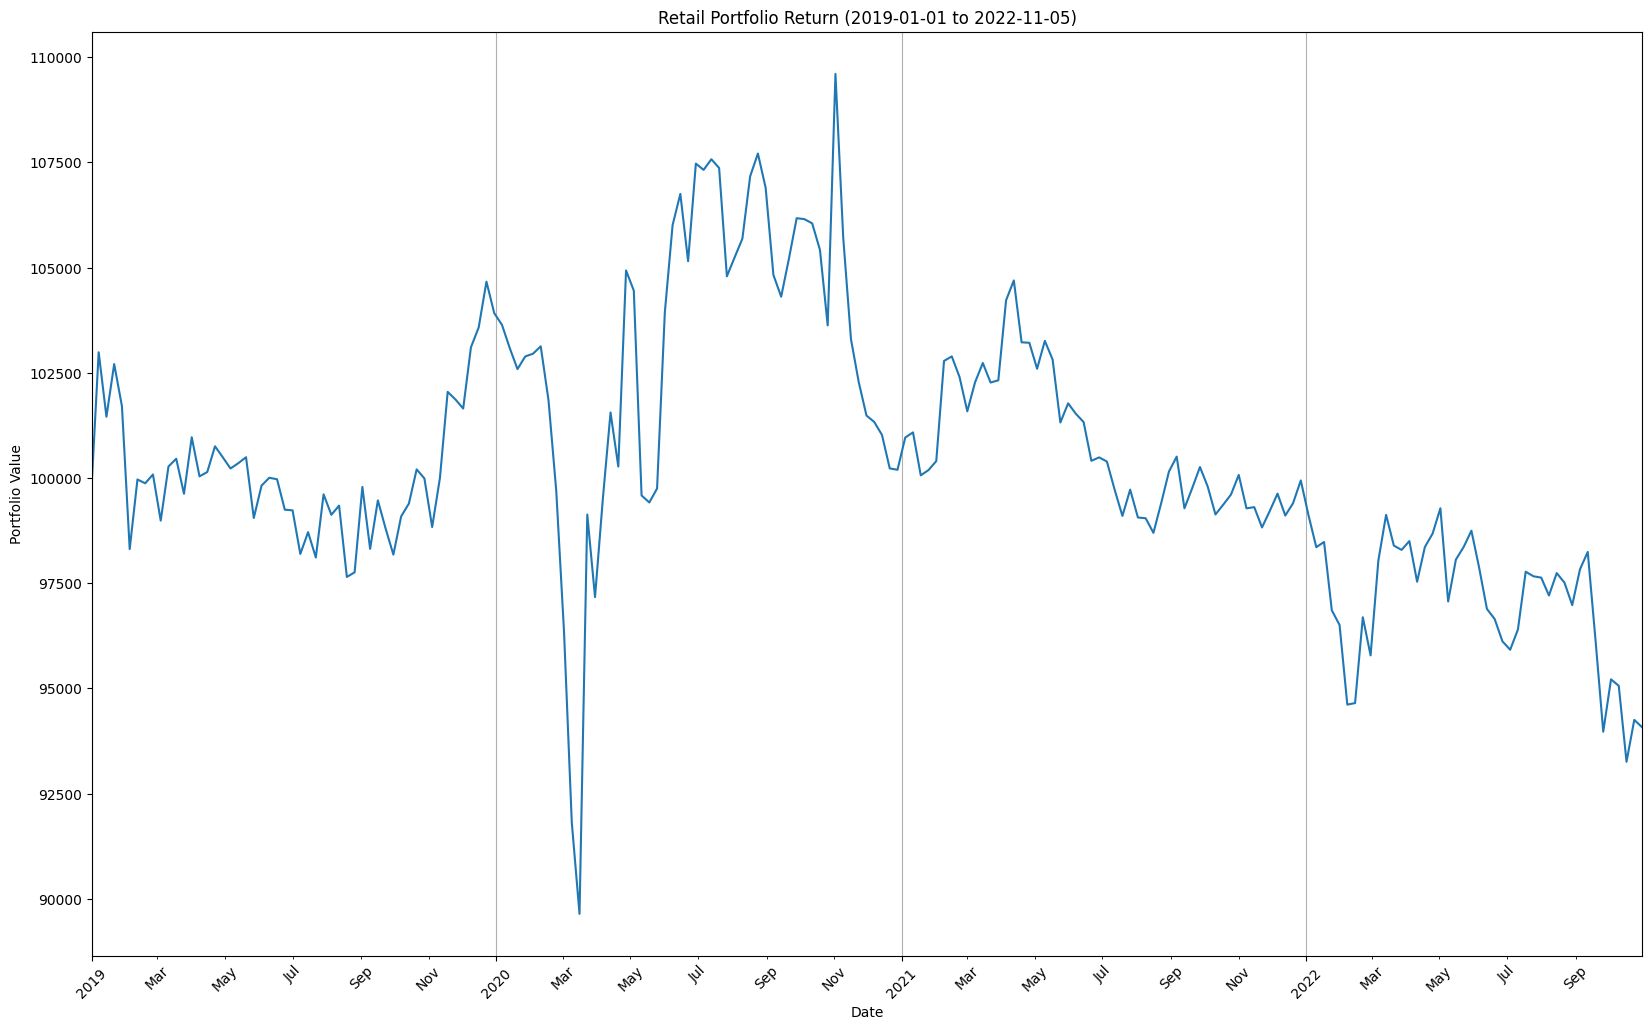

In [11]:
retail_backtest.plot_weekly_port_value()

## 3.2 Instituition Investor

In [12]:
inst_backtest = BacktestPortfolio('Instituition Portfolio')
inst_info = inst_backtest.gen_trade_list_info([inst_buy, inst_sell])

inst_info_pos = inst_info.copy()
inst_info_pos['position'] = inst_info_pos['net amount (S$M)'].apply(follow_buy_sell_strategy)

inst_port_hist = inst_backtest.calc_port_ret(inst_info_pos)
inst_weekly_summary_hist = inst_backtest.get_weekly_summary_trade_hist()

[*********************100%***********************]  106 of 106 completed


c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_re

[*********************100%***********************]  104 of 104 completed


c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_re

In [13]:
inst_info_pos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3697 entries, 2019-01-07 to 2022-10-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   stock code        3697 non-null   object 
 1   stock             3697 non-null   object 
 2   net amount (S$M)  3697 non-null   float64
 3   entry_date        3697 non-null   object 
 4   entry_price       3697 non-null   object 
 5   exit_date         3697 non-null   object 
 6   exit_price        3697 non-null   object 
 7   pct_change        3697 non-null   object 
 8   position          3697 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 417.9+ KB


In [14]:
inst_backtest.port_performance()

[*********************100%***********************]  1 of 1 completed
--- Instituition Portfolio ---
Portfolio value: $ 89,565.88
Portfolio return: -9.23%
Averge weekly return: -0.05%
Volatility weekly return: 1.32%
Annualized volatility: 0.83
Sharpe Ratio: -0.44
Sharpe Ratio: -0.45
Maximum drawdown: -0.22


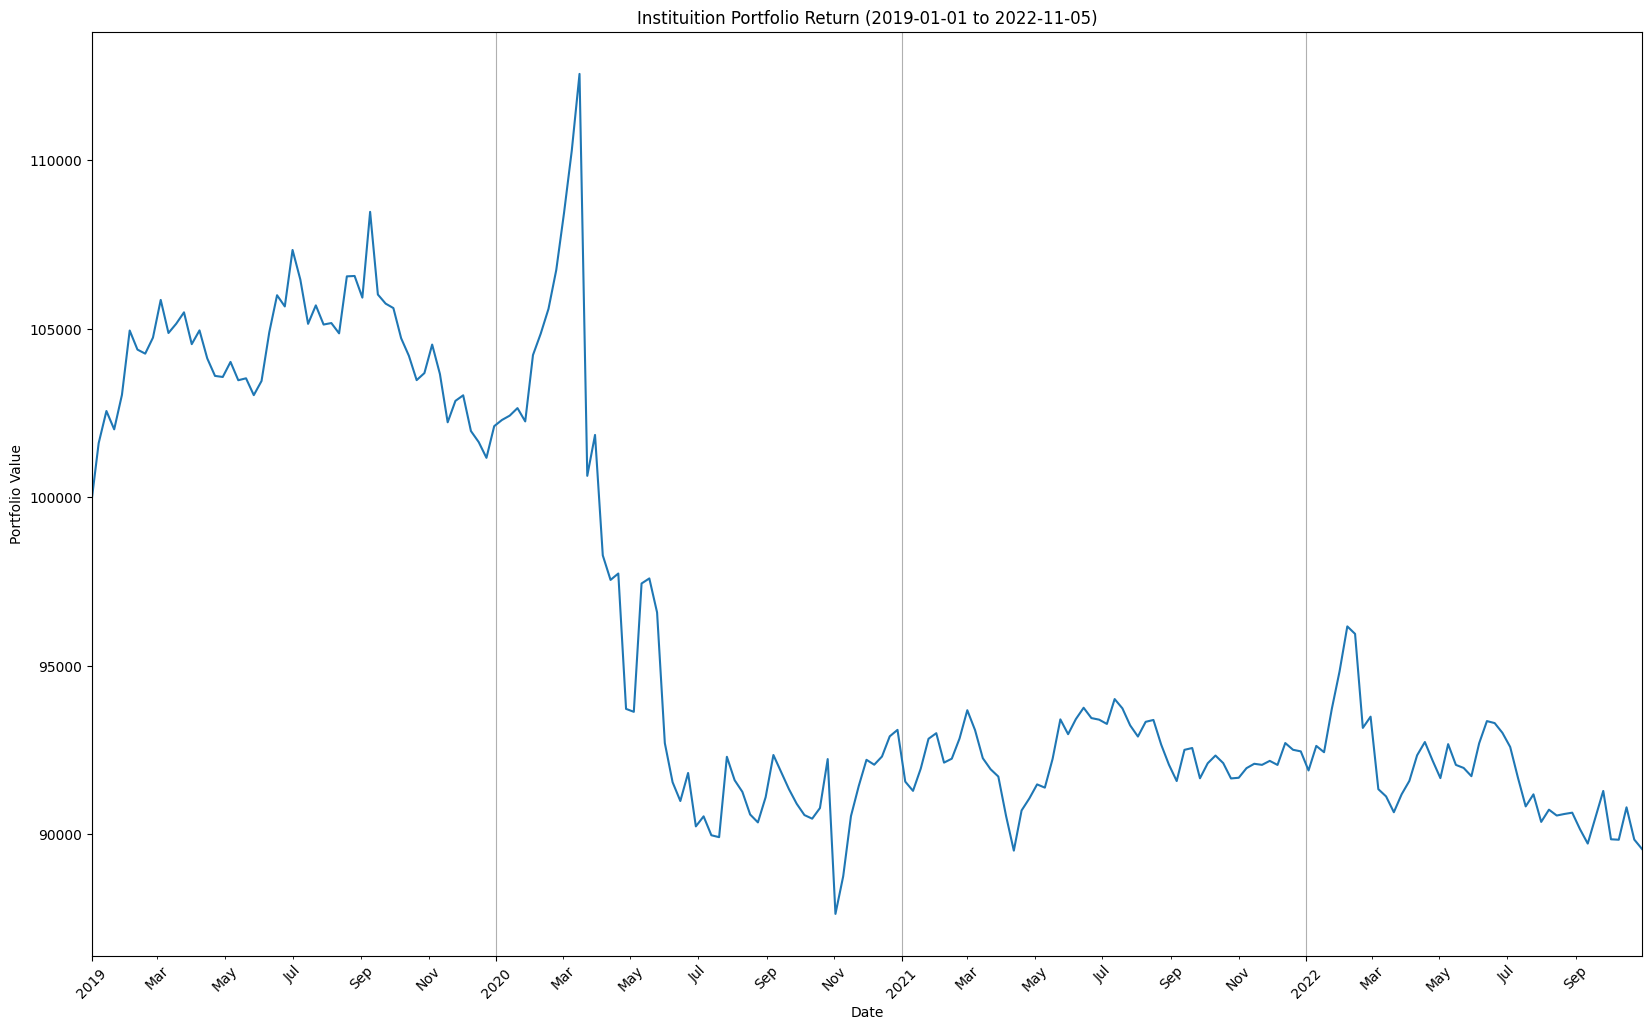

In [15]:
inst_backtest.plot_weekly_port_value()

# 4.0 Summary

Retail investors outperforms instituition investors in term of long and short stocks in SGX.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a59e5772-0ffb-4811-b384-2b5a9f52032a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>